In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

# Dealing with Missing Data

## NumPy

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
x.sum()

15

In [ ]:
print(x.dtype)

int64


In [ ]:
x = np.array([1, 2, 3, None, 5])

In [ ]:
print(x.dtype)

object


In [ ]:
x = np.array([1, 2, 3, '-', 5])

In [ ]:
print(x.dtype)

<U21


In [ ]:
x = np.array([1, 2, 3, np.nan, 5])

In [ ]:
print(x.dtype)

float64


In [ ]:
x.sum()

nan

In [ ]:
x_b = np.array([True, True, True, False, True])
#it is x_boolean, gives True on values, and False where there is no value

In [ ]:
x[x_b]

array([1., 2., 3., 5.])

In [ ]:
x[x_b].mean()

2.75

In [ ]:
m_x = np.ma.masked_array(x, mask= [0, 0, 0, 1, 0])
#masking

In [ ]:
m_x.sum()

11.0

In [ ]:
m_x.mean()

2.75

## Pandas

In [ ]:
df = pd.read_csv("rooms-200719-175226.csv")

In [ ]:
df.head()

,Room_Number,Num_Students,Department,Occupied
0,101.0,1,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3,Electrical,Y
3,104.0,2,Mechanical,Y
4,105.0,NaN,Chemical,N


In [ ]:
df.dtypes

Room_Number     float64
Num_Students     object
Department       object
Occupied         object
dtype: object

In [ ]:
%timeit np.arange(100000, dtype='int').sum()

The slowest run took 20.45 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 215 µs per loop


In [ ]:
%timeit np.arange(100000, dtype='object').sum()
# object type takes significantly longer time than int

100 loops, best of 5: 6.19 ms per loop


In [ ]:
df.Room_Number.isnull()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Room_Number, dtype: bool

In [ ]:
df.Room_Number.isnull().sum()

1

In [ ]:
df.isnull()
#it takes n/a and NA as NaN, but not "na"

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,True
9,False,False,False,False


In [ ]:
df.isnull().sum()

Room_Number     1
Num_Students    3
Department      0
Occupied        1
dtype: int64

In [ ]:
missing_values = ["na", "NA", "n/a", "Empty", "--"]

In [ ]:
df = pd.read_csv("rooms-200719-175226.csv", na_values= missing_values)

In [ ]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,True,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,True
7,False,True,False,False
8,False,True,False,True
9,False,False,False,False


In [ ]:
df.Num_Students.mean()

2.0

In [ ]:
df.Department.unique()

array(['Mechanical', nan, 'Electrical', 'Chemical', 'Civil', 'CS'],
      dtype=object)

In [ ]:
df.Occupied.fillna("N", inplace= True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,N
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,N
9,110.0,2.0,CS,N


In [ ]:
def convert_to_bin(v):
    if v == 'Y':
        return True
    else:
        return False

In [ ]:
df.Occupied = df.Occupied.apply(convert_to_bin)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,NaN,NaN,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,NaN,Chemical,False
5,NaN,1.0,Electrical,True
6,107.0,3.0,Civil,False
7,108.0,NaN,CS,True
8,109.0,NaN,Mechanical,False
9,110.0,2.0,CS,False


In [ ]:
df["Dep2"] = df.Department

In [ ]:
df.Department.fillna(method = "ffill", inplace= True)      #ffill is forward fill, also called "pad"
#it will fill nan value wih the value in above column

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied,Dep2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,NaN,Mechanical,False,NaN
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,NaN,Chemical,False,Chemical
5,NaN,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,NaN,CS,True,CS
8,109.0,NaN,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


In [ ]:
df.Dep2.fillna(method = "bfill", inplace= True)
#it will fill NaN value with the value in the below cell 

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied,Dep2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,NaN,Mechanical,False,Electrical
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,NaN,Chemical,False,Chemical
5,NaN,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,NaN,CS,True,CS
8,109.0,NaN,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


In [ ]:
df.Num_Students.fillna(df.Num_Students.median(), inplace= True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied,Dep2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,2.0,Mechanical,False,Electrical
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,2.0,Chemical,False,Chemical
5,NaN,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,2.0,CS,True,CS
8,109.0,2.0,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


In [ ]:
df.Room_Number.interpolate(inplace= True)
#If there is a series, it will fill the NA accordingly
# interpolate will fill the NA within the range

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied,Dep2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,2.0,Mechanical,False,Electrical
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,2.0,Chemical,False,Chemical
5,106.0,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,2.0,CS,True,CS
8,109.0,2.0,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


# Open Ended Descriptive Statistics

http://research.aspiringminds.com/resources/ameo/

In [4]:
df = pd.read_excel("ameo.xlsx")

In [ ]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.shape

(3998, 38)

In [ ]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [ ]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [ ]:
# Is there the gender biased?

df.Gender.unique()

array(['f', 'm'], dtype=object)

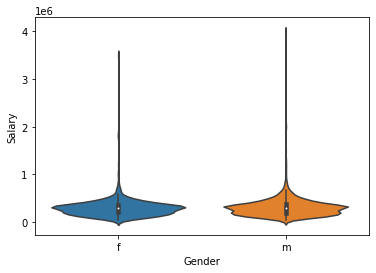

In [ ]:
sns.violinplot(x= "Gender", y= "Salary", data= df);
#We get almost similar graph for both, but tail of male is bigger than of female, that means there are outliers
# Few male earn quite higher than females

In [ ]:
# Checking school and college results

df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()
# Looking at statistical difference

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [ ]:
df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


In [ ]:
# Checking for personality traits

df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [ ]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').median()

#Clearly in all the features, females had done significantly better than males

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.2718,0.3789,0.0914,-0.23440,0.0973
m,-0.0154,0.2124,0.0914,-0.17277,-0.0943


In [ ]:
df[['Salary', 'Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [ ]:
# Finding mean for the people getting paid higher

thres = df.Salary.mean() + df.Salary.std()
df['HighgIncome'] = (df.Salary > thres)
df.sample(10)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,HighgIncome
3218,639664,520000,2013-07-01,present,research engineer,Greater NOIDA,m,1991-08-11,79.2,cbse,2009,73.00,cbse,350,2,B.Tech/B.E.,electronics and communication engineering,68.96,350,0,Uttar Pradesh,2013,555,605,680,0.960603,-1,466,-1,-1,-1,-1,-1,0.2718,0.5454,-2.2954,0.0192,0.2889,False
3554,244546,410000,2012-03-01,2014-12-01 00:00:00,network engineer,Pune,m,1989-03-03,71.0,cbse,2007,58.00,cbse,3427,2,B.Tech/B.E.,electronics and communication engineering,70.10,3427,0,Orissa,2011,525,465,645,0.538387,385,333,-1,-1,-1,260,-1,-1.9629,0.8128,0.2366,0.6498,0.0284,False
2732,265361,400000,2012-03-01,2014-12-01 00:00:00,senior systems engineer,Thiruvananthapuram,f,1990-05-30,92.0,0,2007,81.00,0,1263,2,B.Tech/B.E.,information technology,77.45,1263,1,Tamil Nadu,2011,465,605,355,0.735796,475,-1,-1,-1,-1,-1,-1,0.3555,0.8128,-0.9245,-0.6428,0.0284,False
2964,809634,240000,2014-05-01,present,software engineer,Pune,m,1991-07-11,71.0,state boardmp board,2009,70.80,state board,10389,2,B.Tech/B.E.,computer science & engineering,75.00,10389,0,Madhya Pradesh,2013,325,485,575,0.911395,465,-1,500,-1,-1,-1,-1,0.1282,1.2114,2.0080,0.2727,0.6721,False
3030,806636,240000,2014-01-01,2014-03-01 00:00:00,sales associate,-1,m,1992-05-20,82.2,cbse,2010,69.80,cbse,11759,2,B.Tech/B.E.,electronics and communication engineering,62.20,11759,0,Uttarakhand,2014,520,560,650,0.207392,-1,260,-1,-1,-1,-1,-1,-1.1644,0.0459,1.2396,1.9207,-0.2859,False
3657,1096110,185000,2015-01-01,2015-04-01 00:00:00,operations assistant,Bangalore,m,1992-01-20,67.0,state board,2008,60.44,state board,14708,2,B.Tech/B.E.,computer science & engineering,72.00,14708,0,Orissa,2014,455,455,380,0.237803,455,-1,315,-1,-1,-1,-1,1.5644,1.5444,0.7785,0.1459,0.8637,False
1367,421693,175000,2014-01-01,present,research analyst,-1,m,1989-10-07,66.0,cbse,2007,77.00,cbse,79,2,B.Tech/B.E.,information technology,72.60,79,0,Uttar Pradesh,2012,415,475,405,0.735796,475,-1,-1,-1,-1,-1,-1,-0.1082,-0.0842,0.7083,0.0623,0.3444,False
806,628369,240000,2013-04-01,2014-12-01 00:00:00,software developer,Dehradun,m,1990-06-02,69.0,uttarakhand board,2006,66.00,uttarakhand board,5683,2,MCA,computer application,70.00,5683,0,Uttarakhand,2013,430,520,590,0.080055,595,-1,253,-1,-1,-1,-1,0.2718,1.0449,1.2396,-0.6147,0.4805,False
630,205705,500000,2011-09-01,present,systems engineer,Kolkata,f,1989-04-26,68.0,0,2007,65.00,0,5508,2,B.Tech/B.E.,information technology,74.00,5508,0,Orissa,2011,535,445,525,0.342315,365,-1,-1,-1,-1,-1,-1,-0.4173,0.3448,0.6720,1.5899,-0.1295,False
2750,362798,365000,2013-03-01,present,system engineer,Kolkata,f,1989-08-10,70.0,state board,2007,69.00,state board,5158,2,B.Tech/B.E.,electronics and communication engineering,76.11,5158,0,Uttarakhand,2012,565,445,625,-1.000000,465,-1,-1,-1,-1,-1,-1,0.1282,0.0459,0.3174,0.2727,0.2889,False


In [ ]:
df[['Salary', 'HighgIncome', 'Gender']].groupby(['HighgIncome', 'Gender']).mean()

Salary
HighgIncome Gender               
False       f       271499.454744
            m       272598.433606
True        f       832250.000000
            m       785344.827586

In [ ]:
df[['Salary', 'HighgIncome', 'Gender']].groupby(['HighgIncome', 'Gender']).count()

Salary
HighgIncome Gender        
False       f          917
            m         2809
True        f           40
            m          232

In [ ]:
print("Low income female percentage: ", 917*100/(917+2809))

Low income female percentage:  24.610842726784757


In [ ]:
print("High income female percentage: ", 40*100/(40+232))
# We see that ratio of high income female is very less

High income female percentage:  14.705882352941176


In [ ]:
df.CollegeTier.unique()

array([2, 1])

In [ ]:
df[['CollegeTier', 'HighgIncome', 'Salary']].groupby(['HighgIncome', 'CollegeTier']).mean()

Salary
HighgIncome CollegeTier               
False       1            340619.658120
            2            267751.718213
True        1            820238.095238
            2            783803.827751

In [ ]:
df[['CollegeTier', 'HighgIncome', 'Salary']].groupby(['HighgIncome', 'CollegeTier']).count()

Salary
HighgIncome CollegeTier        
False       1               234
            2              3492
True        1                63
            2               209

In [ ]:
print("Low income college tier 2 percentage: ", 3492*100/(3492+234))

Low income college tier 2 percentage:  93.71980676328502


In [ ]:
print("High income college tier 2 percentage: ", 209*100/(209+63))

High income college tier 2 percentage:  76.83823529411765


In [ ]:
df[['CollegeTier', 'Gender', 'Salary']].groupby(['CollegeTier', 'Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795

In [ ]:
print("In college tier 1, female percentage: ", 51*100/(246+51))

In college tier 1, female percentage:  17.171717171717173


In [ ]:
print("In college tier 2, female percentage: ", 906*100/(906+2795))

In college tier 2, female percentage:  24.479870305322887


In [ ]:
# so we can see that if there are more females in tier 1 college, they can get more of high income jobs

## Agriculture Example

Data taken from government website.

In [13]:
df = pd.read_csv("apy-200719-175226.csv", na_values= "=")

In [6]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [7]:
df.State_Name.unique()
#Clean data, as no state is repeated with its abbrevation or similar

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [8]:
df.Crop_Year.unique()
#data is from 1997-2015

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [10]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [11]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [9]:
df.dtypes
# Production should not be "object", as it is numeric, so there is issue in reading the data

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

In [12]:
pd.to_numeric(df.Production)
# ValueError: Unable to parse string "=" at position 623
# Someone used '=' as the NaN value, so removing it in read_csv

ValueError: ignored

In [14]:
df.dtypes
#Now production values is also been converted to float

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [15]:
df.Production.isnull().sum()
#there are a lot of null values in this

3727

In [16]:
df.shape

(246091, 7)

In [17]:
# as we don't have domain knowledge on what to fill in these missing values, we will drop the rows with NaN

df.dropna(inplace= True)
#drop rows with even one null value
# we can introduce "thresh", to make dropna() little softer for NaN values

In [18]:
df.shape

(242364, 7)

**How different states have yield across the years?**


(0.0, 1.3999999999999999e-11)

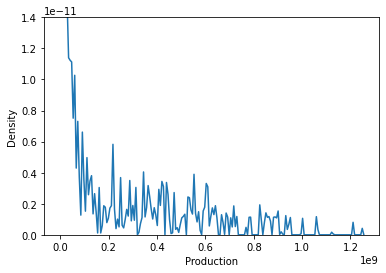

In [26]:
fig = sns.kdeplot(df.Production)
#plt.yticks(fig.get_yticks(), fig.get_yticks() / 10000);
plt.ylim(0, (1.4)* 10**(-11) );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


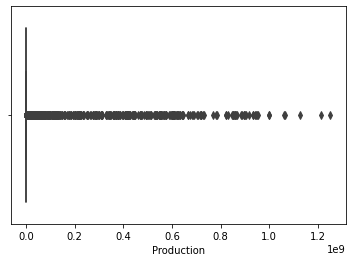

In [27]:
sns.boxplot(df.Production)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


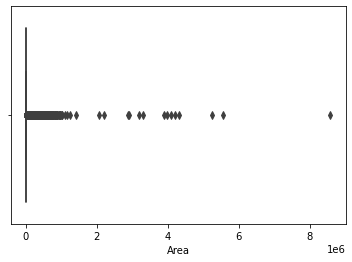

In [28]:
sns.boxplot(df.Area);

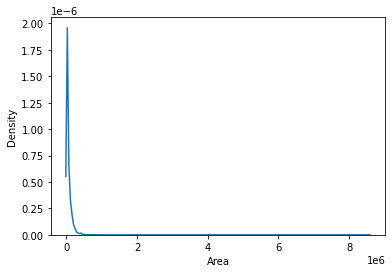

In [29]:
sns.kdeplot(df.Area);

In [31]:
df[df.State_Name == "Karnataka"]["District_Name"].unique()

array(['BAGALKOT', 'BANGALORE RURAL', 'BELGAUM', 'BELLARY',
       'BENGALURU URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR',
       'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
       'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
       'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
       'YADGIR'], dtype=object)

In [32]:
df.groupby(['State_Name', 'Crop', 'Crop_Year']).sum()

Area  Production
State_Name                  Crop     Crop_Year                       
Andaman and Nicobar Islands Arecanut 2000         4354.00     7200.00
                                     2001         4354.00     7300.00
                                     2002         4363.00     7350.00
                                     2003         4379.00     6707.00
                                     2004         4425.37     4781.05
...                                                   ...         ...
West Bengal                 Wheat    2010       316808.00   874415.00
                                     2011       315659.00   872895.00
                                     2012       321572.00   895927.00
                                     2013       331481.00   927837.00
                                     2014       334640.00   939254.00

[12896 rows x 2 columns]

In [33]:
df[df.State_Name == "West Bengal"]['Crop'].unique()

array(['Rice', 'Jute', 'Mesta', 'Urad', 'Gram', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Oilseeds total', 'Wheat', 'Arecanut',
       'Arhar/Tur', 'Coconut ', 'Dry chillies', 'Groundnut', 'Linseed',
       'Maize', 'Potato', 'Pulses total', 'Rapeseed &Mustard', 'Sesamum',
       'Sugarcane', 'Turmeric', 'Dry ginger', 'Sunflower',
       'Peas & beans (Pulses)', 'Cotton(lint)', 'Safflower', 'Garlic',
       'Barley', 'Bajra', 'Horse-gram', 'Other Kharif pulses', 'Soyabean',
       'Jowar', 'Niger seed', 'Sannhamp', 'Small millets', 'Tobacco',
       'Ragi', 'Other  Rabi pulses', 'Cardamom', 'Castor seed', 'Moth'],
      dtype=object)

In [34]:
df.groupby(['State_Name', 'Crop_Year']).sum()
# it's output is (state * year) rows, but here some data is missing

Area   Production
State_Name                  Crop_Year                         
Andaman and Nicobar Islands 2000         44518.00  89060914.00
                            2001         41163.00  89718700.00
                            2002         45231.40  94387137.67
                            2003         44799.40  95296454.67
                            2004         45308.77  87186497.63
...                                           ...          ...
West Bengal                 2010       7246875.00  38308645.00
                            2011       7755360.00  36777774.00
                            2012       7850936.00  38918275.00
                            2013       7999815.00  37901281.00
                            2014       8058390.00  43584403.00

[519 rows x 2 columns]

In [35]:
df_ = df.groupby(['State_Name', 'Crop_Year']).sum()

In [36]:
df_.reset_index(inplace= True)

In [37]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,44518.00,89060914.00
1,Andaman and Nicobar Islands,2001,41163.00,89718700.00
2,Andaman and Nicobar Islands,2002,45231.40,94387137.67
3,Andaman and Nicobar Islands,2003,44799.40,95296454.67
4,Andaman and Nicobar Islands,2004,45308.77,87186497.63


In [39]:
df_[['State_Name', 'Crop_Year']].groupby('State_Name').count()

,Crop_Year
State_Name,
Andaman and Nicobar Islands,8
Andhra Pradesh,18
Arunachal Pradesh,18
Assam,18
Bihar,18
Chandigarh,13
Chhattisgarh,15
Dadra and Nagar Haveli,17
Goa,12


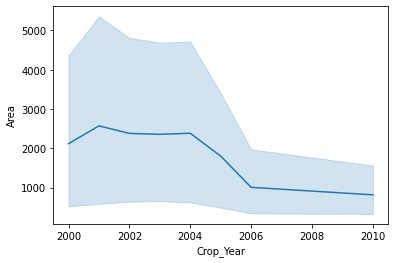

In [40]:
sns.lineplot(x= 'Crop_Year', y= "Area", data= df[df.State_Name == "Andaman and Nicobar Islands"])

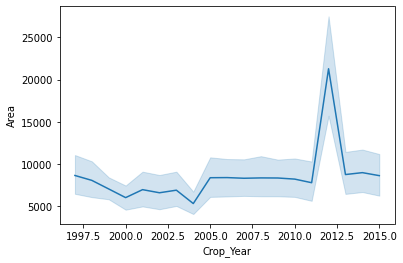

In [41]:
sns.lineplot(x= 'Crop_Year', y= "Area", data= df[df.State_Name == "Odisha"])

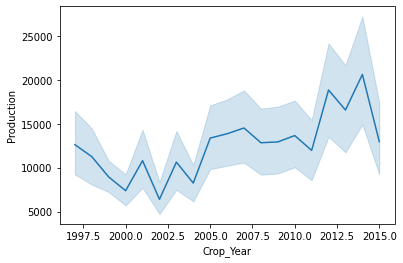

In [42]:
sns.lineplot(x= 'Crop_Year', y= "Production", data= df[df.State_Name == "Odisha"])

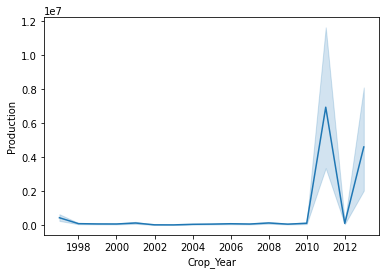

In [43]:
sns.lineplot(x= 'Crop_Year', y= "Production", data= df[df.State_Name == "Tamil Nadu"])

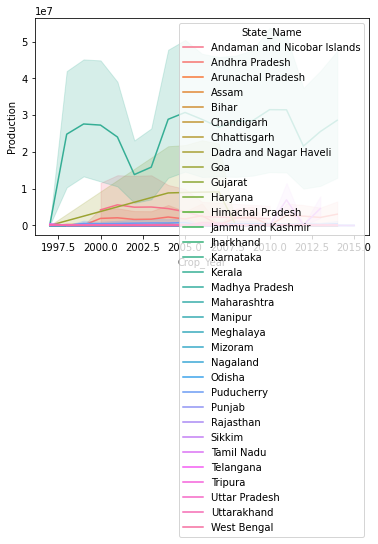

In [44]:
sns.lineplot(x= 'Crop_Year', y= "Production", data= df, hue= "State_Name")

In [46]:
!pip install plotly_express

In [47]:
import plotly_express as px

In [48]:
px.scatter(df_, x= "Area", y="Production", animation_frame= "Crop_Year", animation_group= "State_Name", color= "State_Name")

In [49]:
df_.sort_values('Crop_Year', inplace= True)

In [52]:
df[(df.State_Name == 'Kerala') & (df.Crop_Year == 2000)].sort_values('Production')
# to check what's wrong with Kerala, as it is an outlier
# Across various crops

#So, as 'Coconut' is large sized, so production of Kerala is showing anamoly, as it's size is greater than other crops

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
99868,Kerala,KOTTAYAM,2000,Kharif,Sesamum,6.0,1.0
100437,Kerala,MALAPPURAM,2000,Kharif,Ragi,4.0,3.0
99567,Kerala,KOLLAM,2000,Summer,Rice,4.0,4.0
98946,Kerala,KANNUR,2000,Kharif,Sesamum,10.0,6.0
98604,Kerala,IDUKKI,2000,Kharif,Ragi,8.0,7.0
...,...,...,...,...,...,...,...
101702,Kerala,THRISSUR,2000,Whole Year,Coconut,89472.0,540000000.0
98953,Kerala,KANNUR,2000,Whole Year,Coconut,96975.0,621000000.0
100445,Kerala,MALAPPURAM,2000,Whole Year,Coconut,110378.0,626000000.0
101425,Kerala,THIRUVANANTHAPURAM,2000,Whole Year,Coconut,88663.0,635000000.0


In [53]:
# so we take a subset of Crops to look into
df1 = df[df.Crop. isin(['Rice', 'Wheat', 'Maize', 'Ragi'])].groupby(['State_Name', 'Crop_Year']).sum()

In [54]:
df1.head()

Area  Production
State_Name                  Crop_Year                      
Andaman and Nicobar Islands 2000       10881.00    32184.00
                            2001        9801.00    27333.00
                            2002       10885.00    32111.66
                            2003       10561.37    30850.87
                            2004       10734.92    29192.23

In [55]:
df1.reset_index(inplace= True)

In [56]:
df1.sort_values('Crop_Year', inplace= True)

In [57]:
px.scatter(df1, x= "Area", y="Production", animation_frame= "Crop_Year", animation_group= "State_Name", color= "State_Name")

#so now, we are getting a trend

In [58]:
df1['Efficiency'] = df1['Production'] /  df1['Area']

In [63]:
px.scatter(df1, x= "Area", y= "Efficiency", size= "Production", animation_frame= "Crop_Year", animation_group= "State_Name", color= "State_Name", 
           range_y= [0.75, 5], range_x= [-1E6, 20E6])